In [1]:
pip install pandas numpy matplotlib seaborn sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
pip install scikit-learn
# Installed liblraries

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Mall customer data.zip to Mall customer data.zip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# importing necessary libraries for data manipulation, visualization, and clustering.

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head()  # Preview the first few rows of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()
df.isnull().sum()
# Check for null values and general information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.dropna(inplace=True)  # Dropping missing values


In [9]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# Feature Selection
# Identify relevant features for segmentation (e.g., Age, Income, Spending Score, Annual Purchase Value, etc.).

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Data Scaling

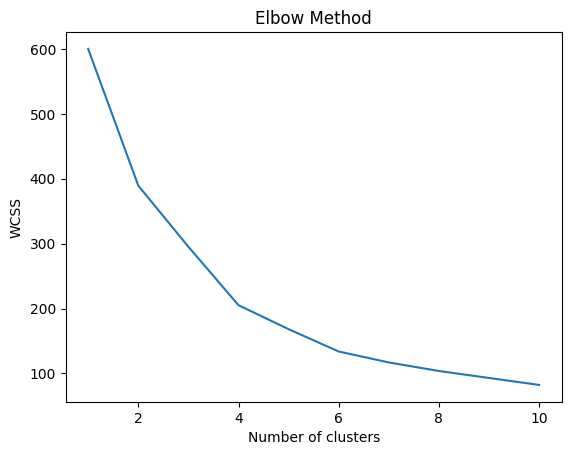

In [11]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Append WCSS (inertia) to the list

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Determine Optimal Number of Clusters (K)
# Use the Elbow Method to identify the optimal number of clusters.

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = clusters
# Apply K-Means with Optimal K

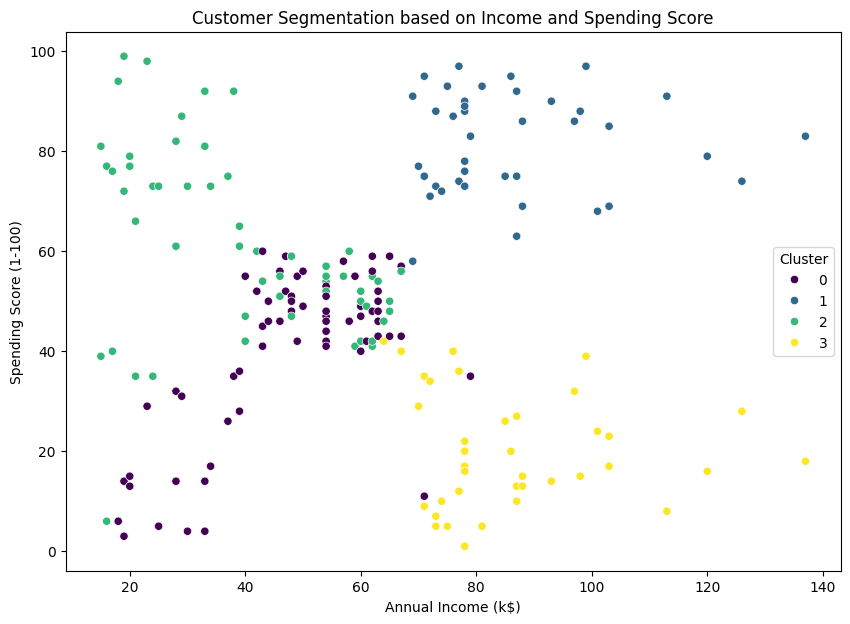

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation based on Income and Spending Score')
plt.show()
#  2D Scatter Plot
# Visualize customer segments using Age, Annual Income, and Spending Score.

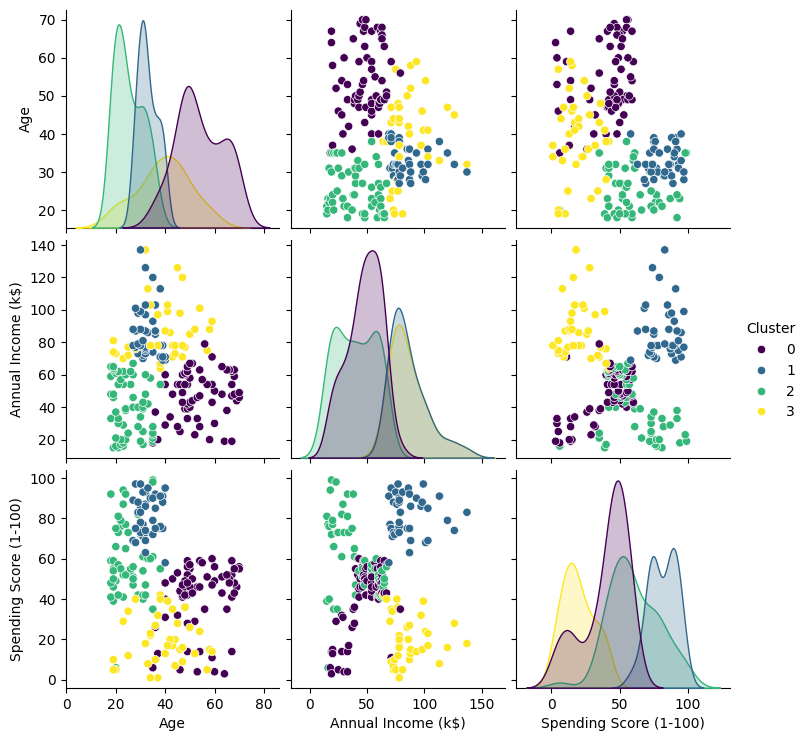

In [15]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()
Pair Plot for Multidimensional View
Visualize multiple features together to better understand the segmentation.

In [19]:
# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=[np.number])

# Group by 'Cluster' and calculate the mean for numeric columns only
cluster_summary = df.groupby('Cluster')[numeric_columns.columns].mean()
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         69.415385  53.984615           47.707692               39.969231   
1        161.025000  32.875000           86.100000               81.525000   
2         53.438596  25.438596           40.000000               60.298246   
3        160.552632  39.368421           86.500000               19.578947   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  


In [20]:
# Get the most common gender in each cluster
gender_summary = df.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])
print(gender_summary)


Cluster
0    Female
1    Female
2    Female
3    Female
Name: Gender, dtype: object
